Klasifikasi Tumor Payudara dengan Decision Tree

In [1]:
# %%
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# %%
# Load data as a dataframe
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

cancer = sklearn_to_df(datasets.load_breast_cancer())
cancer.rename(columns={'target': 'diagnosis'}, inplace=True)

# Statistik deskriptif
cancer.describe().T


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [3]:

cancer.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


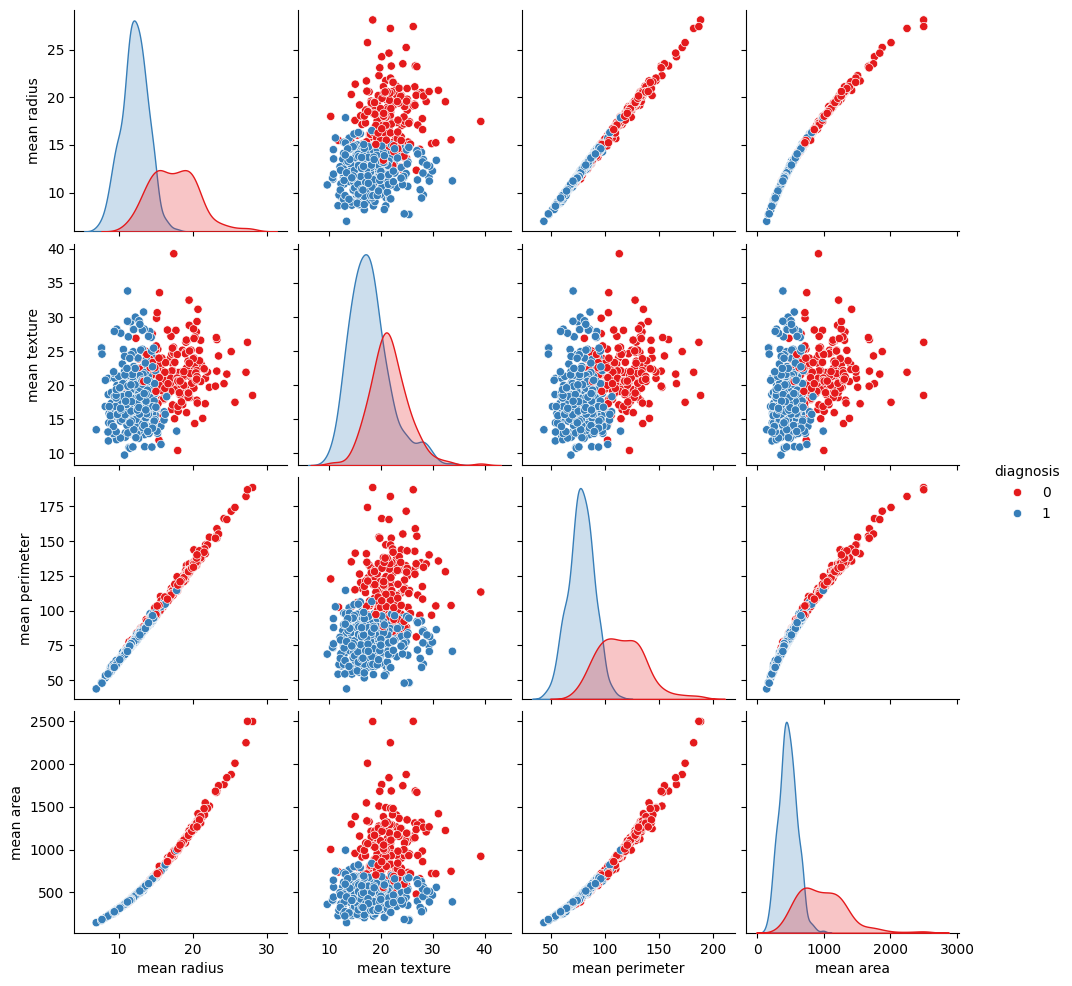

In [4]:
# %%
# Pairplot untuk beberapa fitur saja agar tidak terlalu berat
selected_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'diagnosis']
sns.pairplot(cancer[selected_cols], hue='diagnosis', palette='Set1')


In [5]:
# %%
from sklearn.model_selection import train_test_split

x = cancer.drop('diagnosis', axis=1)
y = cancer['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"Jumlah data training: {len(x_train)}")


Jumlah data training: 398


In [7]:
# %%
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(x_test.head())


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
204        12.47         18.60           81.09      481.9          0.09965   
70         18.94         21.31          123.60     1130.0          0.09009   
131        15.46         19.48          101.70      748.9          0.10920   
431        12.40         17.68           81.47      467.8          0.10540   
540        11.54         14.44           74.65      402.9          0.09984   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
204            0.1058         0.08005              0.03821         0.1925   
70             0.1029         0.10800              0.07951         0.1582   
131            0.1223         0.14660              0.08087         0.1931   
431            0.1316         0.07741              0.02799         0.1811   
540            0.1120         0.06737              0.02594         0.1818   

     mean fractal dimension  ...  worst radius  worst texture  \
204

In [8]:
# %%
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



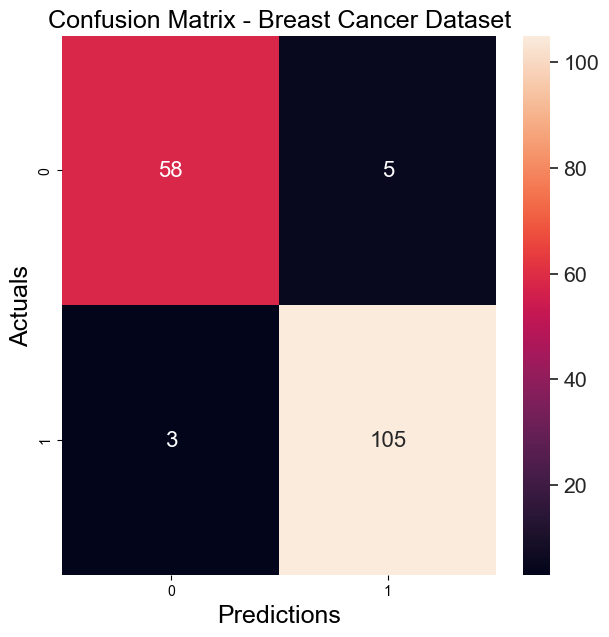

In [9]:
# %%
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(7,7))

sns.set(font_scale=1.4)
sns.heatmap(cm, ax=ax, annot=True, annot_kws={"size": 16}, fmt='d')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix - Breast Cancer Dataset', fontsize=18)
plt.show()


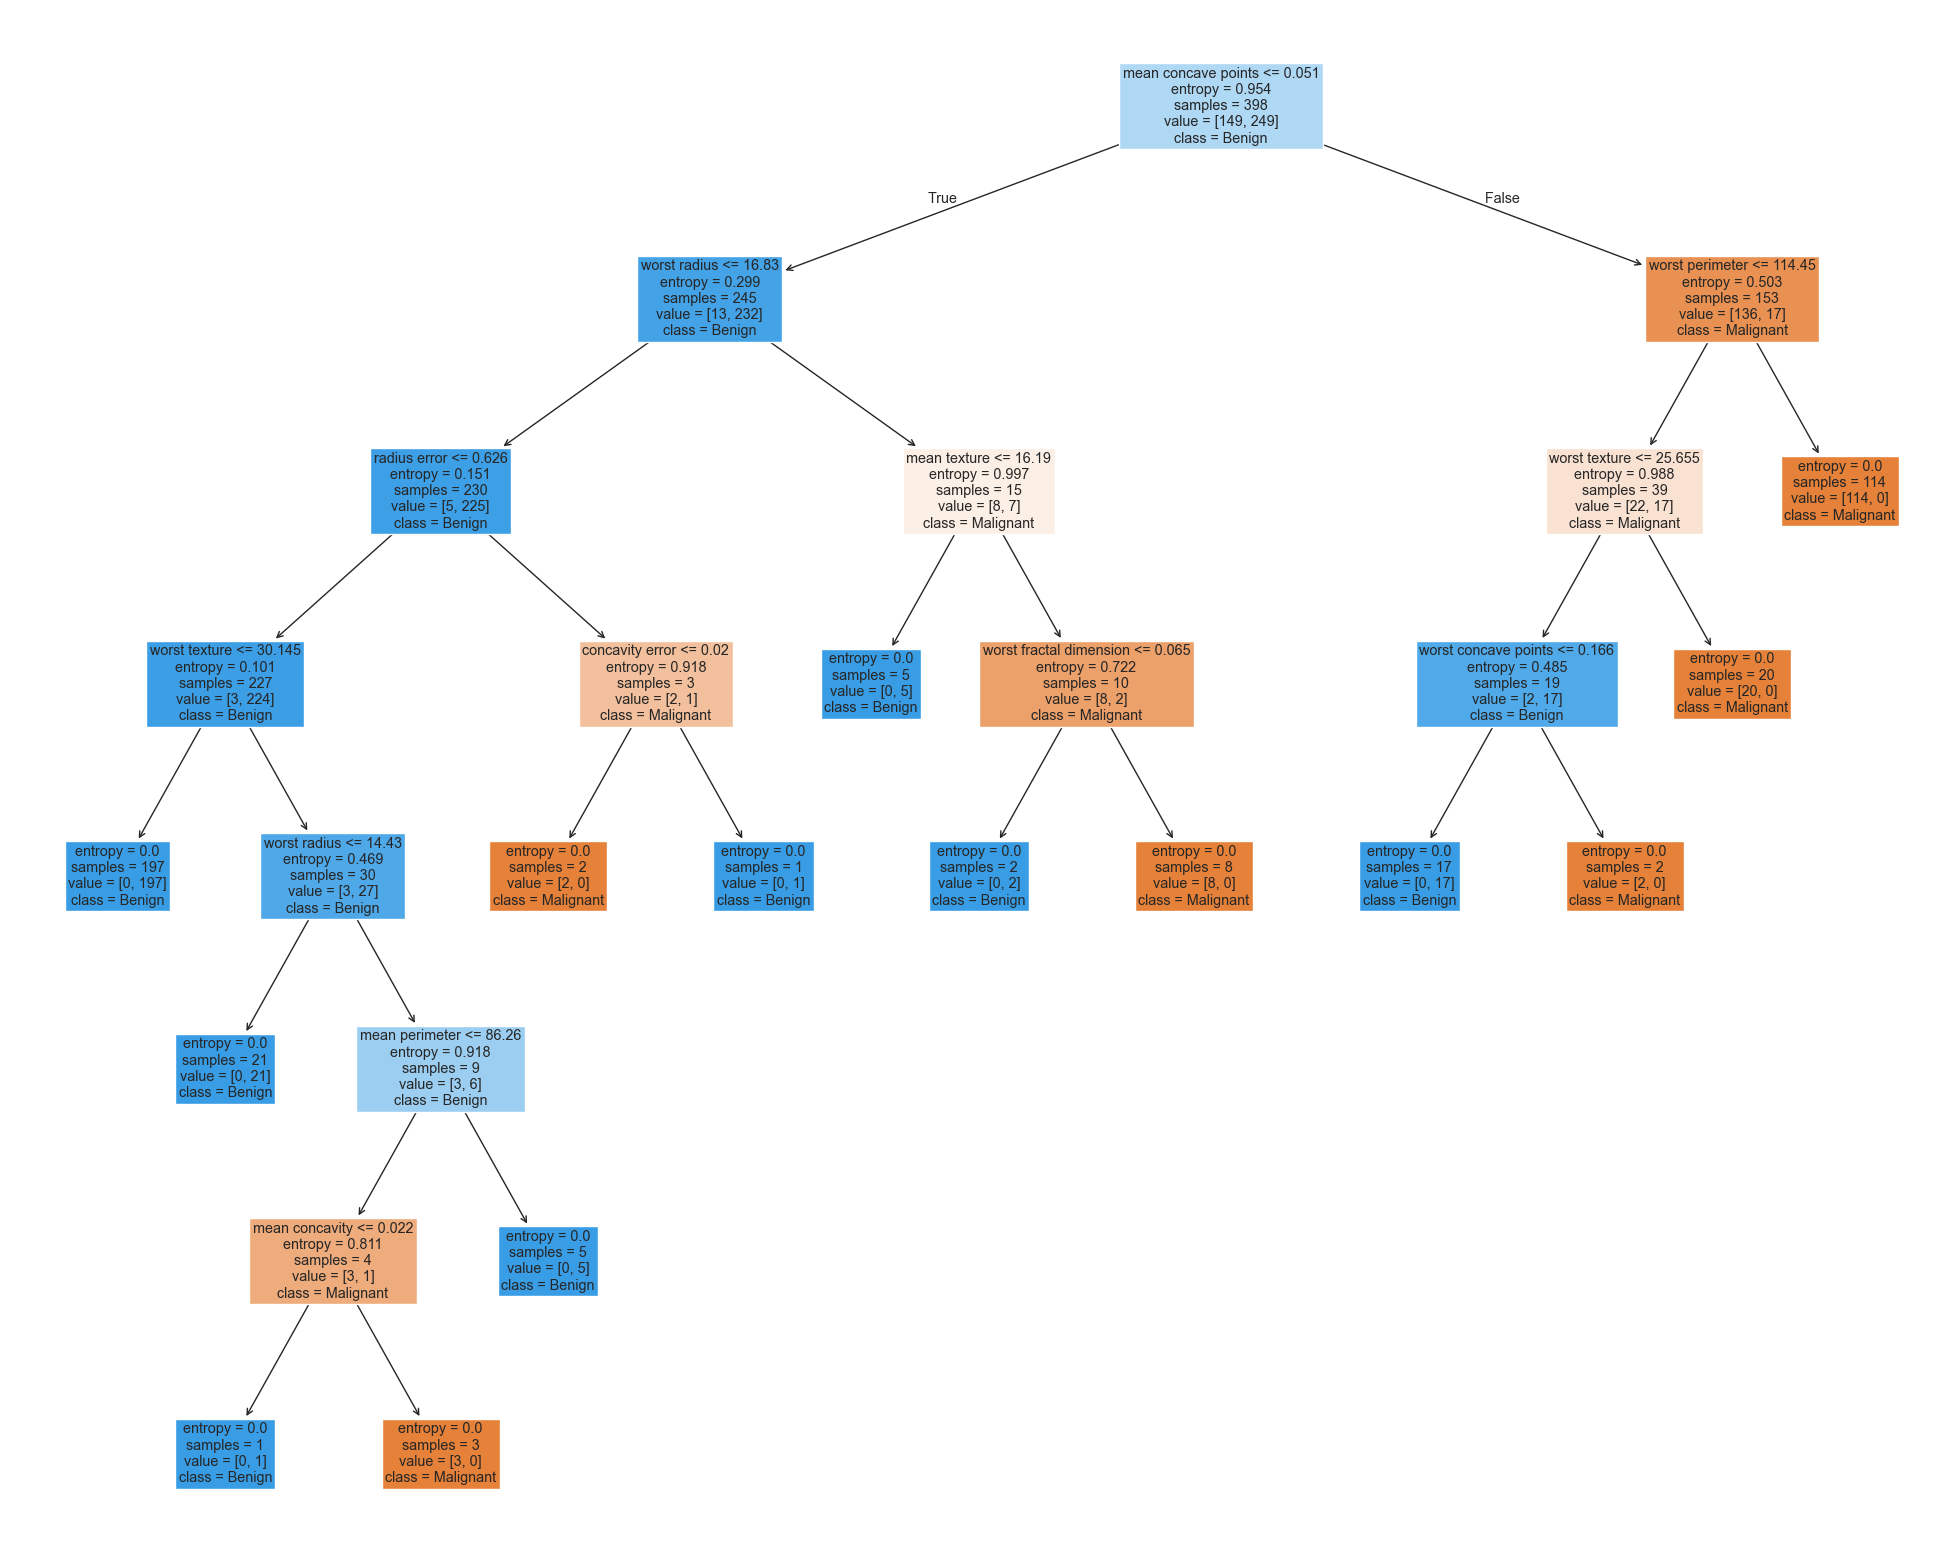

In [10]:
# %%
from sklearn import tree

features = x.columns
fig, ax = plt.subplots(figsize=(25,20))
tree.plot_tree(model, feature_names=features, class_names=['Malignant', 'Benign'], filled=True)
plt.show()
